# Density of Old Houses by Neighborhood  

## By: Amy Zhang

##### Datasets: [Pre 1950 Housing Data](https://data.wprdc.org/dataset/pre-1950-housing/resource/afda23d8-ee01-4731-8419-6170149523a0) and [Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2/resource/668d7238-cfd2-492e-b397-51a6e74182ff?inner_span=True)

#### First, load pandas, geopandas, fpsnippets (delete gpd if u dont use it)

In [43]:
import pandas as pd
%matplotlib inline
import fpsnippets 

In [42]:
#Load in trashcans dataset
SmartTrash= pd.read_csv("SmartTrash.csv")
SmartTrash.head(3)

,_id,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,228688,1,74,2017-09-14T13:24:40,2022-11-24T13:17:19,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,228689,2,74,2017-09-14T13:24:40,2022-12-31T01:54:25,1st Division,2507 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-9,-80.025132,40.467213
2,228690,3,74,2017-09-14T13:24:40,2022-04-14T01:59:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625


In [17]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 
  
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["x"] = 'float'
d["y"] = 'float'
d["_id"] = 'int'
d["container_id"] = 'int'

# places and assets
places = pd.read_csv("SmartTrash.csv", usecols=['_id', 'container_id', 'x', 'y'], index_col="_id", dtype=d)
trashys = pd.DataFrame(columns=('container_id', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['y']
    Longitude = row['x']
    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"container_id": row['container_id'],
             "neighborhood": location})
        #append row's data to assets
        trashys = pd.concat([trashys, new_row.to_frame().T], ignore_index=True)
        
#assets to csv
trashys.to_csv('trashcans.csv', sep=',', index=False, encoding='utf-8')

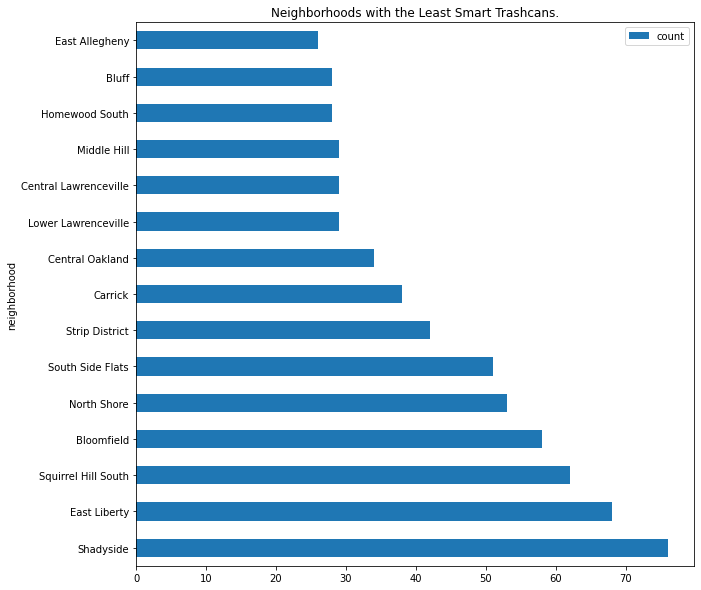

In [41]:
# places and relevant places
trashcans = pd.read_csv("trashcans.csv", usecols=['container_id', 'neighborhood'], dtype=str)

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = trashcans.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=False)

# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_top_trash_counts.csv', index=False)
ax = neighborhood_counts.head(15).plot.barh(x='neighborhood', y='count', figsize=(10, 10,), title='Neighborhoods with the Least Smart Trashcans.')

#### So we can see that from plotting the 15 

#### so a huge challenge was that it kept NOT showing the neighborhoods for the latitude and longitude despite using Griffin's amaze snippets. and Gavin was like, let's search up a coordinate and see where it pops up, what if its in antarctica?? And we were like hahahhaa as if. and then we just swapped the points, and it finally works. so we actually look up the coordinates as the way they are in the dataset. and guess where it was.. ANTARCTICA. so i would say that was the most challenging part of the project. 

In [3]:
# csv version. not super helpful? because i cant use geopandas with this... BUT I COULD BE WRONG
neighborhoods = pd.read_csv("NeighborhoodGeoBounds.csv")
neighborhoods.head

#Separate columns– I only want census tracts and hood names and other possibly usable spatial data
neighborhoods_ctracts = pd.DataFrame(columns=["CensusTracts", "GeoIds", "Neighborhoods","shape_area", "shape_length"])
neighborhoods_ctracts["CensusTracts"] = neighborhoods["tractce10"]
neighborhoods_ctracts["GeoIds"] = neighborhoods["geoid10"]
neighborhoods_ctracts["Neighborhoods"] = neighborhoods["hood"]
neighborhoods_ctracts["shape_area"] = neighborhoods["shape_area"]
neighborhoods_ctracts["shape_length"] = neighborhoods["shape_length"]
neighborhoods_ctracts.head()

,CensusTracts,GeoIds,Neighborhoods,shape_area,shape_length
0,140500,420031405003,Point Breeze North,8.417066e+06,14181.728231
1,140100,420031401003,Squirrel Hill North,3.410838e+07,30326.729782
2,101700,420031017002,Garfield,1.275115e+07,14577.426320
3,050900,420030509001,Bedford Dwellings,4.897512e+06,13941.514212
4,300100,420033001005,Knoxville,8.353056e+06,12021.864889


# Asbestos Permits Analysis

## By: Amy Zhang

##### Dataset: [Asbestos Permit Data](https://data.wprdc.org/dataset/allegheny-county-asbestos-permit/resource/0a5408a4-8358-4b14-9317-090db7c61fd9)

In [44]:
# Load in asbestos permits dataset
asbestos = pd.read_csv("Asbestos.csv")
asbestos.head()

,_id,permit_number,s_name,s_address,city,z_code,p_fee,pa_license_no,contractor_name,permit_specifications,...,i_date,e_date,achd_inspector,job_complete,is_permit_date_extended,permit_o_e_date,project_type,status,latitude,longitude
0,1877885,UND210038,PORT AUTHORITY OF ALLEGHENY COUNTY,1011 LEBANON RD,WEST MIFFLIN,15122,0.0,908.0,"BRISTOL ENVIRONMENTAL, INC.","""REMOVE 1"""" GARAGE FITTINGS""",...,2021-04-29,2021-04-29,CALI FEENEY,t,f,2021-04-29,UND,COMPLETE,40.362450,-79.930840
1,1877886,PAA210081,AGH-3RD EGRESS CORRIDOR SNYDER PAVILION,320 E NORTH AVE,PITTSBURGH,15212,450.0,929.0,"NOVA ENVIRONMENTAL SERVICES, INC.","""REMOVE 12"""" X 12"""" BEIGE VCT AND BLACK MASTIC""",...,2021-02-25,2021-06-30,JOE YAKUBISIN,t,f,2021-06-30,PAA,COMPLETE,40.457069,-80.003698
2,1877887,PAA194619,NIOSH BUILDING 41 - 626 COCHRANS MILL ROAD,NaN,PITTSBURGH,15236,450.0,925.0,"KLA ROOFING & CONSTRUCTION, LLC","""REMOVE 12""""X12"""" FLOOR TILE/MASTIC IN ROOMS 1...",...,2019-09-19,2019-11-18,JOE YAKUBISIN,t,f,2019-11-18,PAA,COMPLETE,40.349070,-79.973554
3,1877888,PAA194572,FORMER JEFFERSON HILLS MUNICIPAL BUILDING,3008 OLD CLAIRTON RD,JEFFERSON HILLS,15025,450.0,921.0,GRAY WASTE MANAGEMENT CORPORATION,"""REMOVE 9""""X9"""" FLOOR TILE ON 1ST FLOOR UNDER ...",...,2019-08-21,2020-08-20,JOE YAKUBISIN,t,f,2020-08-20,PAA,COMPLETE,40.294042,-79.919035
4,1877889,PAA180001,BETTIS ATOMIC POWER LABORATORY-COMPUTING CTR R...,814 PITTSBURGH MCKEESPORT BLVD,WEST MIFFLIN,15122,850.0,940.0,"SPECTRUM ENVIRONMENTAL, LLC","""REMOVE 9""""X9"""" FLOOR TILEIN SELECT AREA BENEA...",...,2018-01-02,2019-01-02,JOE YAKUBISIN,t,f,2019-01-02,PAA,COMPLETE,40.357235,-79.899141


In [ ]:
# Use fpsnippets to get the stuff